#Predict Using the CNN network


*  CNNs are a type of deep learning algorithm used primarily for image and video recognition tasks.
*  They are inspired by the structure and function of the human visual system, which is able to recognize objects in complex visual scenes
CNNs consist of multiple layers of interconnected neurons, which learn to
recognize increasingly complex features in an image
*   The first layer of a CNN typically consists of convolutional filters, which perform mathematical operations on the input image to extract low-level features such as edges and corners
*   Subsequent layers of the CNN combine these low-level features to form higher-level features, such as shapes and patterns
*   CNNs are trained using large datasets of labeled images, which allow them to learn to recognize a wide variety of objects and scenes
*   Once trained, CNNs can be used to classify new images or detect objects within them with a high degree of accuracy
*   CNNs have been used in a wide range of applications, including self-driving cars, medical image analysis, and facial recognition.

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Dense,Activation,Dropout,Flatten,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#import warnings
#warnings.filterwarnings("ignore")

#!pip install pillow==4.0.0
from PIL import Image

In [ ]:
width = 56
height= 56
input_shape = ( 56,56)
print(input_shape)

(20, 20)


In [ ]:
img_width, img_height = width,height
train_data_dir = '/drive/Pruned'
validation_data_dir = '/drive/Test'

numberOfClass=9
batch_size = 16
epochs=150

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.95,
    zoom_range=0.95,
    horizontal_flip=True,vertical_flip=True)



test_datagen = ImageDataGenerator(rescale=1. / 255)


train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


Found 900 images belonging to 9 classes.


Epoch 1/150
57/57 [==============================] - 5s 78ms/step - loss: 2.2030 - accuracy: 0.1416 - val_loss: 2.1637 - val_accuracy: 0.1856
Epoch 2/150
57/57 [==============================] - 4s 64ms/step - loss: 2.1519 - accuracy: 0.1408 - val_loss: 2.1279 - val_accuracy: 0.1889
Epoch 3/150
57/57 [==============================] - 4s 64ms/step - loss: 2.1052 - accuracy: 0.1800 - val_loss: 2.0308 - val_accuracy: 0.2367
Epoch 4/150
57/57 [==============================] - 4s 64ms/step - loss: 2.0551 - accuracy: 0.2237 - val_loss: 2.0677 - val_accuracy: 0.2144
Epoch 5/150
57/57 [==============================] - 4s 69ms/step - loss: 2.0107 - accuracy: 0.2472 - val_loss: 1.8894 - val_accuracy: 0.3133
Epoch 6/150
57/57 [==============================] - 4s 63ms/step - loss: 1.8801 - accuracy: 0.3246 - val_loss: 1.8626 - val_accuracy: 0.3044
Epoch 7/150
57/57 [==============================] - 4s 73ms/step - loss: 1.9012 - accuracy: 0.3006 - val_loss: 1.8306 - val_accuracy: 0.3356
Epoch 

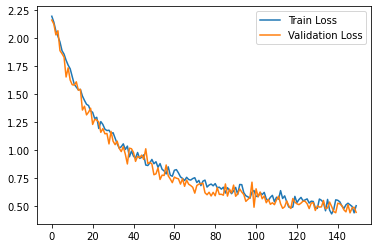

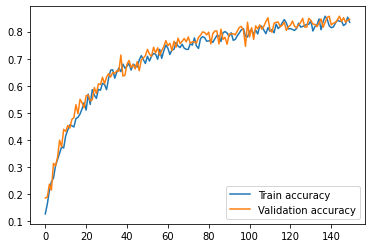

In [ ]:
from tensorflow.keras import layers
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), padding = 'same',activation='relu', input_shape=(56, 56, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(9))

model.compile(optimizer='adam',
             loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
hist = model.fit_generator(
        generator=train_generator,
        epochs=epochs,
        validation_data=train_generator)


# model plot

print(hist.history.keys())

plt.plot(hist.history["loss"], label ="Train Loss")
plt.plot(hist.history["val_loss"], label ="Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"], label ="Train accuracy")
plt.plot(hist.history["val_accuracy"], label ="Validation accuracy")
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_generator)

57/57 [==============================] - 3s 51ms/step - loss: 0.4581 - accuracy: 0.8667


[0.45811381936073303, 0.8666666746139526]

## Final Model accuracy is approx 85% which is sufficient

##Finally a CNN model should be deployed to the client as the running cost would be also quite less.